## Data Science task by [Mahmoud Basha](mailto:mahmoudbuiltin@gmail.com)

## Table OF Contents:
* [Import dataset](#first-bullet)
    * [load dataset and basic exploration](#first-1-bullet)
    * [Further basic inspection](#first-2-bullet)
* [Data preperation](#second-bullet)
    * [Handling null values](#second-1-bullet)
    * [Handle duplicates](#second-2-bullet)
    * [Drop unnecessary Columns](#second-3-bullet)
* [Data Visualisations](#third-bullet)
    * [Using Tableau](#third-1-bullet)
    * [Using Pyhton](#third-2-bullet)

## Import dataset and needed libraries <a class="anchor" id="first-bullet"></a>

In [1]:
import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# allow display of multiple outputs by running one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

##### load dataset and preform basic exploration <a class="anchor" id="first-1-bullet"></a>

In [2]:
# Please change the path to match the path to the excel file on your system
df = pd.read_csv("D:/eT3 opportunity/task/Data-science task/drinkMenu.csv")

df.head()
df.info()
df.describe()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


###### Findings : 

- We observe that the excel sheet contains a total of 18 attribute; none of them is an ID attribute.


- 3 of the 18 columns (Beverage_category, Beverage, Beverage_prep) are clear strings represented as pandas object data type. 9 of the 18 are numeric columns (Calories, Trans Fat (g), Saturated Fat (g), Sodium (mg), Total Carbohydrates (g), Cholesterol (mg), Dietary Fibre (g), Sugars (g), Protein (g)). The ramining 6 columns are of type object and can use further inspection.


- In terms of null values only one value is reported missing in the 'Caffeine' column by pandas info() function, more values can still be missing but are represented as another string value that pandas isn't detecting.  

###### Inspect 6 object type columns <a class="anchor" id="first-2-bullet"></a>

In [3]:
df['Caffeine (mg)'].value_counts()

75        37
0         35
150       34
70        14
varies    12
95        11
Varies    10
110        9
130        7
25         6
120        6
90         4
175        4
20         3
125        3
10         3
145        3
50         3
100        3
140        3
55         3
80         3
180        3
85         3
30         3
15         3
170        3
165        2
410        1
235        1
330        1
225        1
260        1
300        1
65         1
105        1
Name: Caffeine (mg), dtype: int64

varies and Varies are probably respresenting the same thing so we should merge into one value.

In [4]:
df.replace('Varies','varies',inplace=True)

All the percentage columns can be converted from object type to numeric 

In [5]:
df['Iron (% DV) '].value_counts()

0%        99
2%        20
10%       17
20%       16
8%        15
6%        14
15%       11
4%        11
30%        9
25%        9
0.00%      9
40%        3
35%        3
50%        2
6.00%      1
8.00%      1
10.00%     1
15.00%     1
Name: Iron (% DV) , dtype: int64

In [6]:
# remove the percentage sign % and convert into int 
df['Vitamin A (% DV) '] = df['Vitamin A (% DV) '].map(lambda x: x.rstrip('%')).astype('int64')
df['Vitamin C (% DV)'] = df['Vitamin C (% DV)'].map(lambda x: x.rstrip('%')).astype('int64')
df[' Calcium (% DV) '] = df[' Calcium (% DV) '].map(lambda x: x.rstrip('%')).astype('int64')

""" Iron (% DV) column has floats, but after checking the values after the decimal 
points are all zeros thus it qualifies to be an int """

df['Iron (% DV) '] = df['Iron (% DV) '].map(lambda x: x.rstrip('%')).astype('float64').astype('int64')

' Iron (% DV) column has floats, but after checking the values after the decimal \npoints are all zeros thus it qualifies to be an int '

In [7]:
df[' Total Fat (g)'].value_counts()

0.1    34
0      21
1.5    16
5      15
3      15
4      14
0.2    14
1      13
2.5    13
6      13
3.5    12
7      10
2      10
4.5     9
0.3     6
8       6
9       6
0.5     4
11      3
10      3
0.4     2
15      1
13      1
3 2     1
Name:  Total Fat (g), dtype: int64

In [8]:
#correct error in entry "3 2"
df[' Total Fat (g)'].replace('3 2','3.2',inplace=True)

# convert ' Total Fat (g)' to float 
df[' Total Fat (g)']=df[' Total Fat (g)'].astype('float64')

## Data preperation <a class="anchor" id="second-bullet"></a>

###### Handling null values <a class="anchor" id="second-1-bullet"></a>

In [9]:
# first check the null that was reoported by info() function 
print(df[df['Caffeine (mg)'].isnull()])

         Beverage_category                                        Beverage  \
158  Shaken Iced Beverages  Iced Brewed Coffee (With Milk & Classic Syrup)   

    Beverage_prep  Calories   Total Fat (g)  Trans Fat (g)   \
158       2% Milk        90             1.0             0.5   

     Saturated Fat (g)   Sodium (mg)   Total Carbohydrates (g)   \
158                0.0             5                         25   

     Cholesterol (mg)   Dietary Fibre (g)   Sugars (g)   Protein (g)   \
158                18                   0           18            2.0   

     Vitamin A (% DV)   Vitamin C (% DV)   Calcium (% DV)   Iron (% DV)   \
158                  2                 0                 6             0   

    Caffeine (mg)  
158           NaN  


We see that the null exists in row 158 and the row has normal entries in the rest of the attributes. We can conclude that the entry is MCAR (missing completely at Random). To handle the missing value we can simply delete the row with the messing value, use mean imputation, or we can use machine learning assisted imputations, I will demonstrate the three methods.

In [10]:
#method 1 -> delete row with missing value
df1 = df.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          241 non-null    object 
 1   Beverage                   241 non-null    object 
 2   Beverage_prep              241 non-null    object 
 3   Calories                   241 non-null    int64  
 4    Total Fat (g)             241 non-null    float64
 5   Trans Fat (g)              241 non-null    float64
 6   Saturated Fat (g)          241 non-null    float64
 7    Sodium (mg)               241 non-null    int64  
 8    Total Carbohydrates (g)   241 non-null    int64  
 9   Cholesterol (mg)           241 non-null    int64  
 10   Dietary Fibre (g)         241 non-null    int64  
 11   Sugars (g)                241 non-null    int64  
 12   Protein (g)               241 non-null    float64
 13  Vitamin A (% DV)           241 non-null    int64  

In [11]:
#method 2 -> imputation using mean 

"""We first need to replace the 'varies' value with a numeric value,  
assuming varies refer to the value varying within the existing range of values we can use the mean to 
replace the keyword varies
"""
# replace varies keyword with a null value 
df['Caffeine (mg)'].replace('varies',np.nan,inplace=True)

# convert column to type float
df['Caffeine (mg)'] = df['Caffeine (mg)'].astype("float64")

# get the mean value of the 'Caffeine (mg)' column 
mean_value = df['Caffeine (mg)'].mean()

# fill null values (varies + null) with mean value
df2 = df.fillna(value=mean_value)

df2.info()
df2.at[158, 'Caffeine (mg)']

"We first need to replace the 'varies' value with a numeric value,  \nassuming varies refer to the value varying within the existing range of values we can use the mean to \nreplace the keyword varies\n"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    float64
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    int64  

89.52054794520548

In [12]:
#method 3 -> prepare data for knn imputer

#select only numeric columns
numeric_df = df2.select_dtypes(include=np.number)

#revert the single null value at row 158 to original form
numeric_df.at[158, 'Caffeine (mg)'] = np.nan

column_names = numeric_df.columns

values = numeric_df.values

In [13]:
# imputation using k-Nearest Neighbor 
imputer = KNNImputer()

#preform imputation 
new_df = imputer.fit_transform(values)

# rebuild the data frame 
df3 = pd.DataFrame(new_df, 
             columns=column_names)
df3.insert(0,'Beverage_category',df['Beverage_category'])
df3.insert(1,'Beverage',df['Beverage'])
df3.insert(2,'Beverage_prep',df['Beverage_prep'])

df3.info()
df3.at[158, 'Caffeine (mg)']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    float64
 4    Total Fat (g)             242 non-null    float64
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    float64
 8    Total Carbohydrates (g)   242 non-null    float64
 9   Cholesterol (mg)           242 non-null    float64
 10   Dietary Fibre (g)         242 non-null    float64
 11   Sugars (g)                242 non-null    float64
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    float64

86.9041095890411

We observe that the K-Nearest neighbour with default K value resulted in an output very close to the mean value.

###### Handle duplicates <a class="anchor" id="second-2-bullet"></a>

In the dataset there is no ID cloumn to assist us in detecting the duplicates right away, thus we need to find other ways .The basic way is to use drop_duplicates function with default Parameters

In [14]:
df3.drop_duplicates()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,175.0
1,Coffee,Brewed Coffee,Tall,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,260.0
2,Coffee,Brewed Coffee,Grande,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,330.0
3,Coffee,Brewed Coffee,Venti,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,10.0,0.0,20.0,0.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320.0,3.2,0.4,0.0,0.0,250.0,67.0,1.0,64.0,5.0,6.0,8.0,20.0,10.0,0.0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170.0,0.1,0.1,0.0,0.0,160.0,39.0,0.0,38.0,4.0,6.0,0.0,10.0,0.0,0.0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200.0,3.5,2.0,0.1,10.0,160.0,39.0,0.0,38.0,3.0,6.0,0.0,10.0,0.0,0.0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180.0,1.5,0.2,0.0,0.0,160.0,37.0,1.0,35.0,3.0,4.0,0.0,10.0,6.0,0.0


Another way is to check if the (Beverage_category, Beverage, and Beverage_prep ) have same values for two or more entries

In [15]:
df_no_duplicates = df3.drop_duplicates(subset=['Beverage_category','Beverage','Beverage_prep'])
df_no_duplicates

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,175.0
1,Coffee,Brewed Coffee,Tall,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,260.0
2,Coffee,Brewed Coffee,Grande,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,330.0
3,Coffee,Brewed Coffee,Venti,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,10.0,0.0,20.0,0.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Venti Nonfat Milk,310.0,0.2,0.1,0.0,5.0,260.0,70.0,0.0,69.0,6.0,10.0,8.0,20.0,4.0,0.0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170.0,0.1,0.1,0.0,0.0,160.0,39.0,0.0,38.0,4.0,6.0,0.0,10.0,0.0,0.0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200.0,3.5,2.0,0.1,10.0,160.0,39.0,0.0,38.0,3.0,6.0,0.0,10.0,0.0,0.0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180.0,1.5,0.2,0.0,0.0,160.0,37.0,1.0,35.0,3.0,4.0,0.0,10.0,6.0,0.0


###### Finding:

We observe that the first method didn't mark any row as a duplicate, but the second method marked and dropped 90 entry. To finalize which mehtod is better we will need to have more domain knowledge on the dataset (i.e. can the combination of the three columns 'Beverage_category','Beverage','Beverage_prep' be considred as identifier)(can a drink have the same 'Beverage_category','Beverage','Beverage_prep' and still have different nutritional values). With my current limited domain knowledge I say that the second method of dropping duplicates is more accurate.

###### Column importance <a class="anchor" id="second-3-bullet"></a>

In [16]:
# method 1 : Removing features with low variance

#select only numeric columns
numeric = df3.select_dtypes(include=np.number)
data = numeric.values

# define estimator with threshold = 1 
# drop features with variances close to 1
sel = VarianceThreshold(threshold=1)

#scaling data 
std_slc = StandardScaler()
X_std = std_slc.fit_transform(data)

# fit estimator on data
_ = sel.fit(X_std)

# create a mask to get column names that were kept
mask = sel.get_support()

# important column names
important_columns = numeric.loc[:, mask].columns

# print removed columns
np.setdiff1d(numeric.columns,important_columns)

array([' Calcium (% DV) ', ' Protein (g) ', ' Sodium (mg)', ' Sugars (g)',
       ' Total Fat (g)', 'Caffeine (mg)', 'Cholesterol (mg)',
       'Iron (% DV) ', 'Saturated Fat (g)', 'Trans Fat (g) ',
       'Vitamin A (% DV) ', 'Vitamin C (% DV)'], dtype=object)

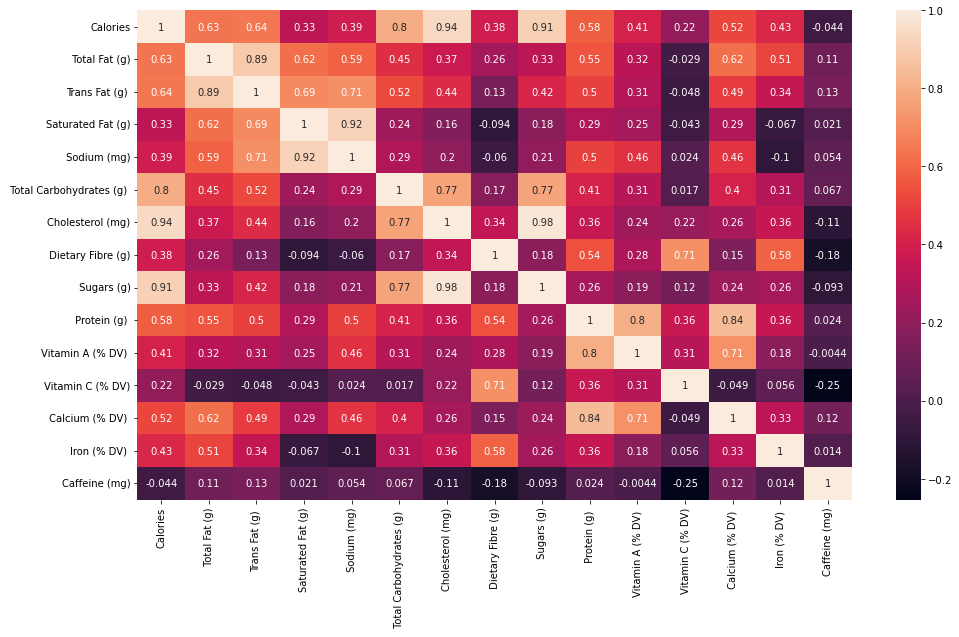

In [17]:
# method 2 -> correlation heat map 
plt.figure(figsize=(16, 9))

sns.heatmap(df3.corr(), annot=True);

The highly correlated featuers can be assumed to be redundant, thus if two featuers are highly correlated we can keep one and remove the other. example: 'Cholesterol (mg)' and 'Calories' are highly correlated so we can remove 'Calories' and keep 'Cholesterol (mg)'.

In [18]:
# Finally to drop a cloumn we can use 
df_dropped  = df3.drop(['Calories'], axis=1)
df_dropped

,Beverage_category,Beverage,Beverage_prep,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,175.0
1,Coffee,Brewed Coffee,Tall,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,260.0
2,Coffee,Brewed Coffee,Grande,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,330.0
3,Coffee,Brewed Coffee,Venti,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,10.0,0.0,20.0,0.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,3.2,0.4,0.0,0.0,250.0,67.0,1.0,64.0,5.0,6.0,8.0,20.0,10.0,0.0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,0.1,0.1,0.0,0.0,160.0,39.0,0.0,38.0,4.0,6.0,0.0,10.0,0.0,0.0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,3.5,2.0,0.1,10.0,160.0,39.0,0.0,38.0,3.0,6.0,0.0,10.0,0.0,0.0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,1.5,0.2,0.0,0.0,160.0,37.0,1.0,35.0,3.0,4.0,0.0,10.0,6.0,0.0


## Data Visualisations <a class="anchor" id="third-bullet"></a>

###### Using Tableau <a class="anchor" id="third-1-bullet"></a>

In [19]:
# saving df_no_duplicates to csv to visulaize in tableau
df_no_duplicates.to_csv("D:/eT3 opportunity/task/Data-science task/out.csv")

Q1. Which drink has the highest calories from the dataset?

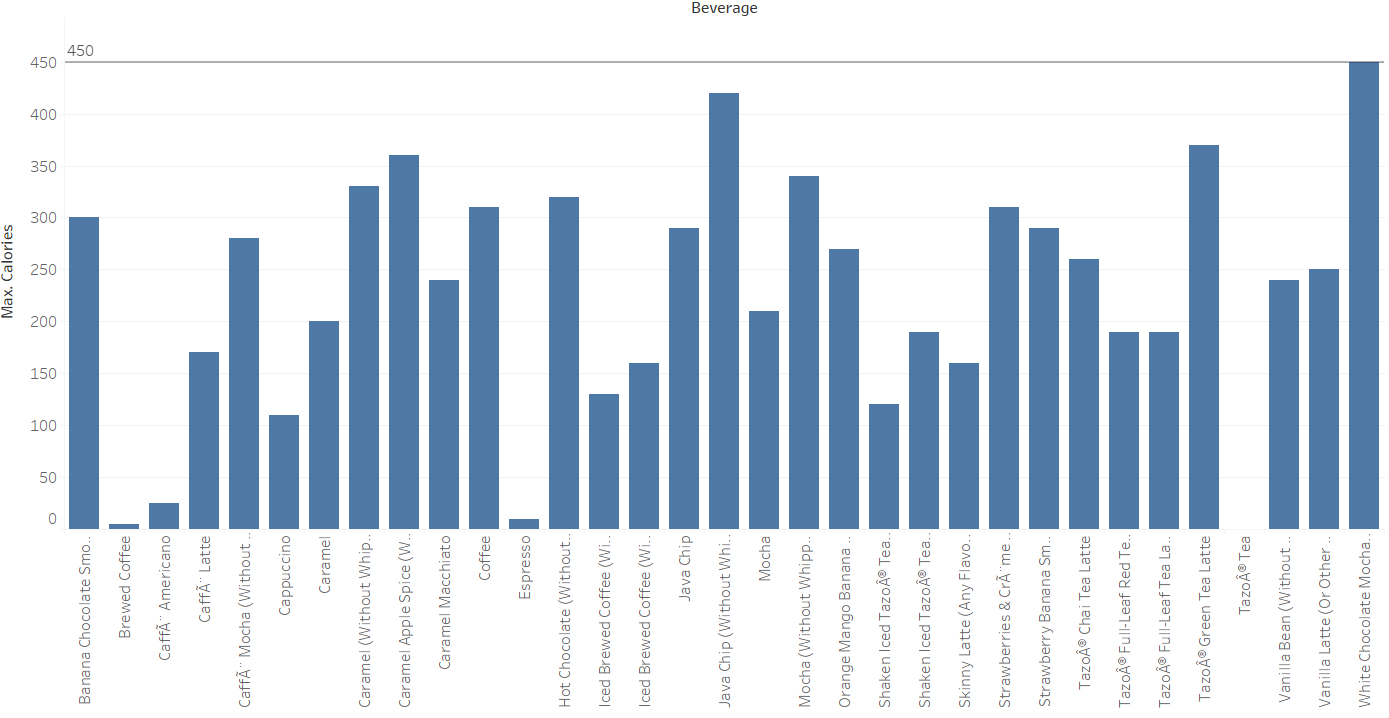

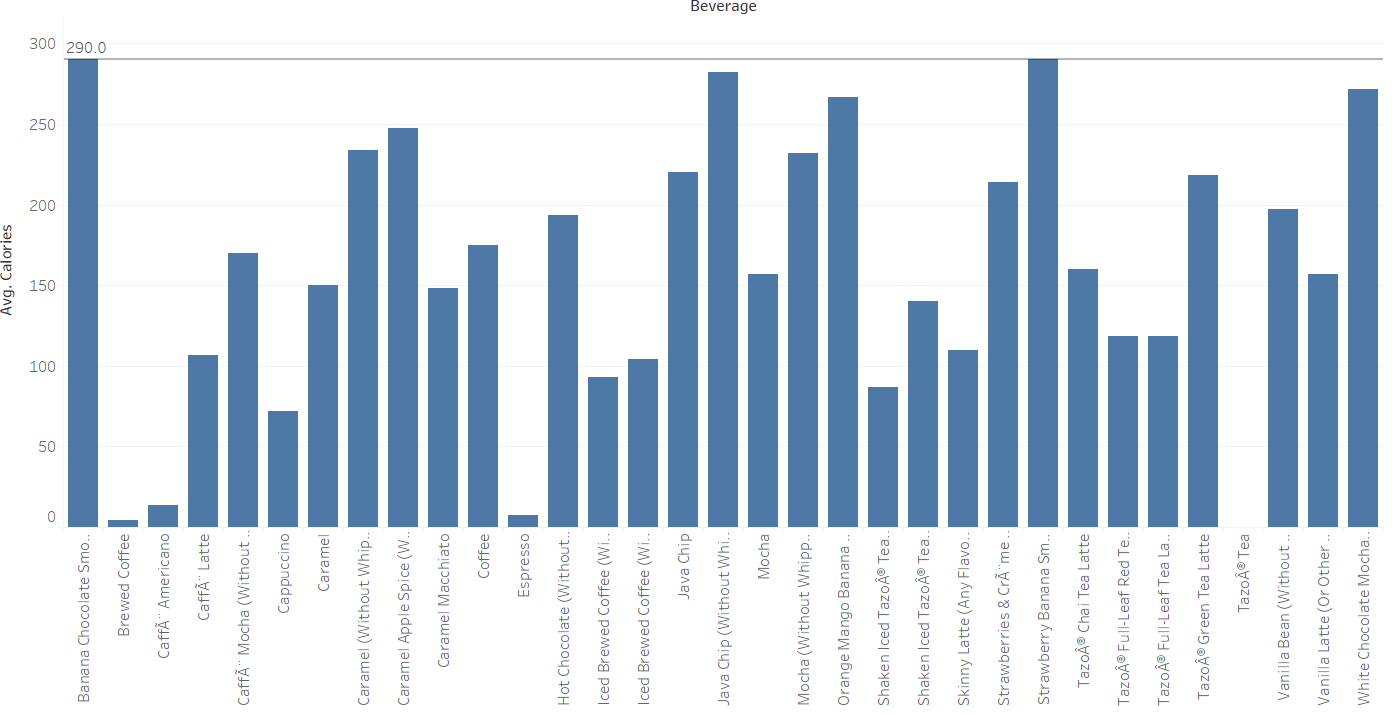

The drink that has the absolute highest calories is 'White Chocolate Mocha (Without Whipped Cream)'.

But on average 'Banana Chocolate Smoothie' and 'Strawberry Banana Smoothie' are the highest in calories with 'Java Chip' and 'White Chocolate Mocha (Without Whipped Cream)' being the runner ups.

Q2. Highest Sugar Drink ?

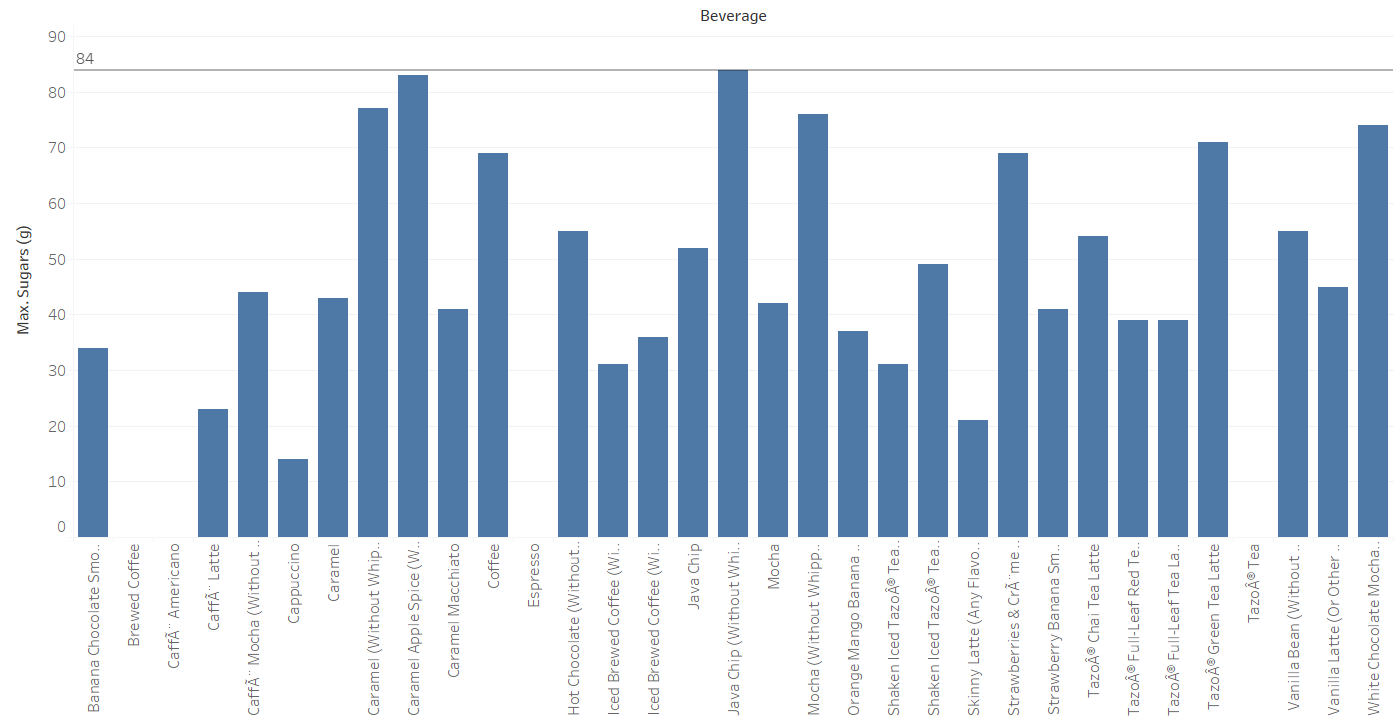

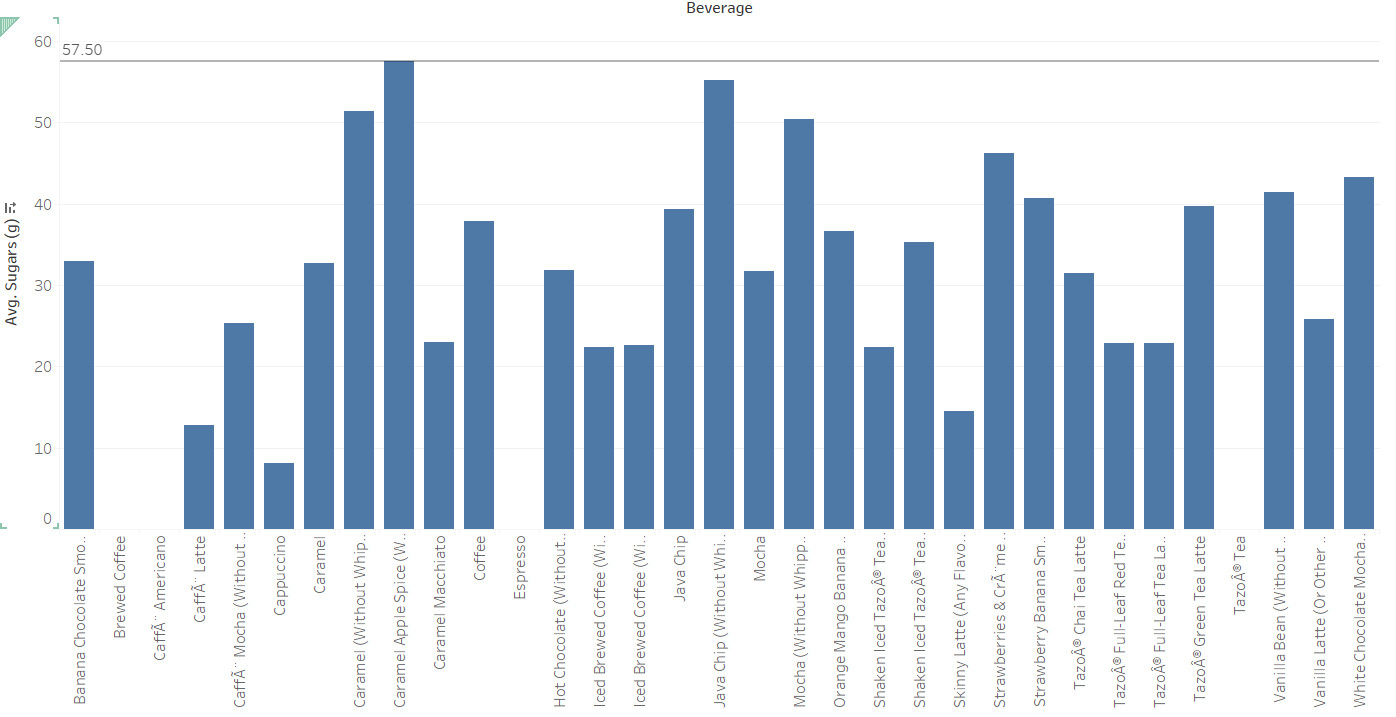

Drink that has absolute highest sugar is 'Java Chip (Without Whipped Cream)' with 'Caramel Apple Spice (Without Whipped Cream)' being very close.

On average 'Caramel Apple Spice (Without Whipped Cream)' is the highest in sugar 

###### Using Python <a class="anchor" id="third-2-bullet"></a>

Q1. Which drink has the highest calories from the dataset?

In [20]:
#group the dataframe by the Beverage and create a column for the max calories in each group
result = df_no_duplicates.groupby('Beverage').agg({'Calories': ['max']})

<Figure size 1152x648 with 0 Axes>

<BarContainer object of 33 artists>

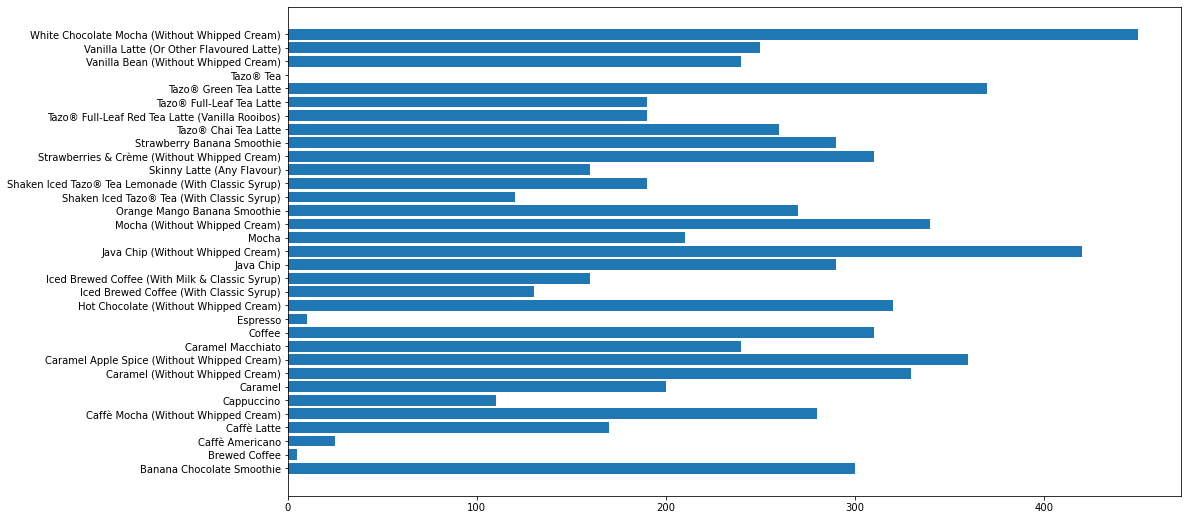

In [21]:
# plot a horizontal bar chart
plt.figure(figsize=(16, 9))
plt.barh(result.index, result.values.reshape(33))

We observe that the results is consistent with the tableau results, 'White Chocolate Mocha (Without Whipped Cream)' have the absolute highest value in Calories.

Q2. Highest Sugar Drink ?

In [22]:
#group the dataframe by the Beverage and create a column for the max calories in each group
result = df_no_duplicates.groupby('Beverage').agg({' Sugars (g)': ['max']})

<Figure size 1152x648 with 0 Axes>

<BarContainer object of 33 artists>

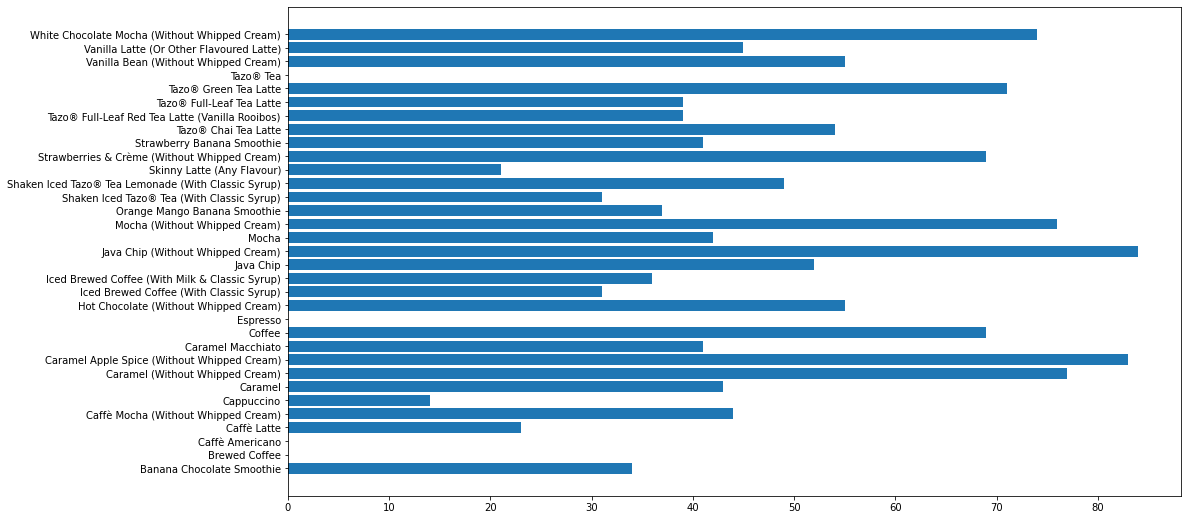

In [23]:
# plot a horizontal bar chart
plt.figure(figsize=(16, 9))
plt.barh(result.index, result.values.reshape(33))

We again observe that the drink with absolute max sugar is 'Java Chip (Without Whipped Cream)' which is consistent with tableau results.